# Intrusion Detection System
---

## Load Preprocessed Data

In [1]:
# import pandas as pd

# # load dataset
# df = pd.read_csv('../data/preprocessed/binary_one_hot_min_max_small.csv')
# df.shape
# df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,BENIGN,MALICIOUS
0,0.001221,3.838251e-01,0.000032,0.000027,3.744186e-05,3.216096e-06,0.018010,0.000000,0.010163,0.021926,...,2.346841e-04,0.000287,5.247273e-04,1.364455e-04,0.083274,0.000065,0.083297,0.083212,True,False
1,0.001221,1.333333e-07,0.000005,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,False,True
2,0.001221,8.224395e-01,0.000027,0.000017,2.511628e-05,1.769005e-05,0.013054,0.000000,0.007791,0.017186,...,4.545455e-08,0.000000,4.545455e-08,4.545455e-08,0.822500,0.000000,0.822500,0.822500,False,True
3,0.229480,9.036856e-02,0.000000,0.000017,4.651163e-07,4.576987e-08,0.000242,0.002581,0.001010,0.000000,...,3.101364e-04,0.000000,3.101364e-04,3.101364e-04,0.090000,0.000000,0.090000,0.090000,True,False
4,0.006760,5.702540e-01,0.000141,0.000110,1.717054e-04,7.884623e-06,0.015391,0.000000,0.011651,0.012809,...,2.673343e-02,0.000000,2.673343e-02,2.673343e-02,0.485000,0.000000,0.485000,0.485000,True,False


In [2]:
# # check for NaN values
# print(f"NaN Values : {df.isnull().sum().sum()}")

# # print Label value counts
# print(df[' Label'].value_counts())

NaN Values : 0
BENIGN
True     1617
False     383
Name: count, dtype: int64


## Create Small Dataset

In [19]:
# # create df with N samples of each class which holds at least N samples
# N = 2000
# small_df = pd.DataFrame()
# for label in df[' Label'].unique():
#     if df[df[' Label'] == label].shape[0] >= N:
#         small_df = pd.concat([small_df, df[df[' Label'] == label].sample(N)], ignore_index=True)
#     else:
#         small_df = pd.concat([small_df, df[df[' Label'] == label]], ignore_index=True)

# print(small_df[' Label'].value_counts())
# print('Shape: ', small_df.shape)

## Split Data

In [3]:
# from sklearn.model_selection import train_test_split

# # split data
# X = df.drop(columns=[' Label'])
# y = df[' Label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

---

## Load Data Split

In [2]:
import pandas as pd

X_train = pd.read_csv("../CICIDS2017/train_test_split/X_train.csv")
X_test = pd.read_csv("../CICIDS2017/train_test_split/X_test.csv")
y_train = pd.read_csv("../CICIDS2017/train_test_split/y_train.csv")
y_test = pd.read_csv("../CICIDS2017/train_test_split/y_test.csv")

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2120907, 70) (706969, 70) (2120907, 2) (706969, 2)


## Model Creation

In [4]:
# Create DNN model from tensorflow
import setuptools.dist # needed to avoid error
import tensorflow as tf
from tensorflow import keras

# normal keras model
# TODO: test with 40, 40, 20 and simple adam optimizer
# model = keras.Sequential()
# model.add(keras.layers.Dense(50, input_dim=X_train.shape[1], activation='relu')) # hidden layer
# model.add(keras.layers.Dense(30, activation='relu')) # hidden layer
# model.add(keras.layers.Dense(10, activation='relu')) # hidden layer
# model.add(keras.layers.Dense(1, activation='sigmoid')) # output layer

# keras model for handling one hot encoded labels -> needed for attack creation
model = keras.Sequential()
model.add(keras.layers.Dense(50, input_dim=X_train.shape[1], activation='relu')) # hidden layer
model.add(keras.layers.Dense(30, activation='relu')) # hidden layer
model.add(keras.layers.Dense(10, activation='relu')) # hidden layer
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))  # Output layer with softmax for one-hot encoding

# set learning rate
opt = keras.optimizers.Adam(learning_rate=0.001)
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

## Model Training

In [5]:
# fit the keras model on the dataset
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)

Epoch 1/10
21210/21210 ━━━━━━━━━━━━━━━━━━━━ 61s 3ms/step - accuracy: 0.9574 - loss: 0.0994 - val_accuracy: 0.9791 - val_loss: 0.0466
Epoch 2/10
21210/21210 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.9780 - loss: 0.0478 - val_accuracy: 0.9800 - val_loss: 0.0435
Epoch 3/10
21210/21210 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - accuracy: 0.9806 - loss: 0.0418 - val_accuracy: 0.9808 - val_loss: 0.0389
Epoch 4/10
21210/21210 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - accuracy: 0.9821 - loss: 0.0396 - val_accuracy: 0.9837 - val_loss: 0.0369
Epoch 5/10
21210/21210 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - accuracy: 0.9831 - loss: 0.0381 - val_accuracy: 0.9843 - val_loss: 0.0364
Epoch 6/10
21210/21210 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - accuracy: 0.9837 - loss: 0.0371 - val_accuracy: 0.9853 - val_loss: 0.0353
Epoch 7/10
21210/21210 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - accuracy: 0.9843 - loss: 0.0361 - val_accuracy: 0.9849 - val_loss: 0.0359
Epoch 8/10
21210/21210 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - accuracy: 

## Result Visualization

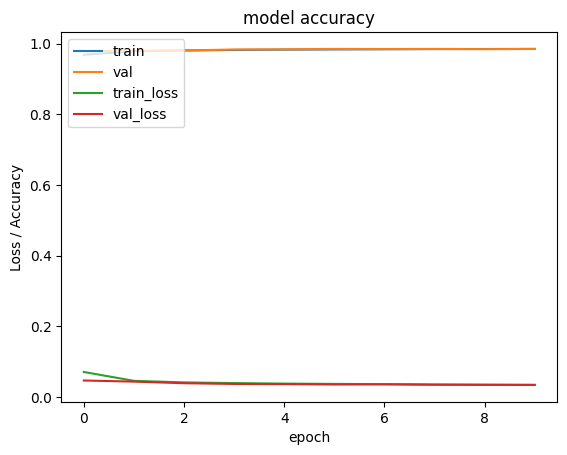

In [6]:
import matplotlib.pyplot as plt

history = model.history.history
# plot loss / accuracy vs epoch for train acc, validation acc, train loss, validation loss
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Loss / Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'train_loss', 'val_loss'], loc='upper left')
plt.show()


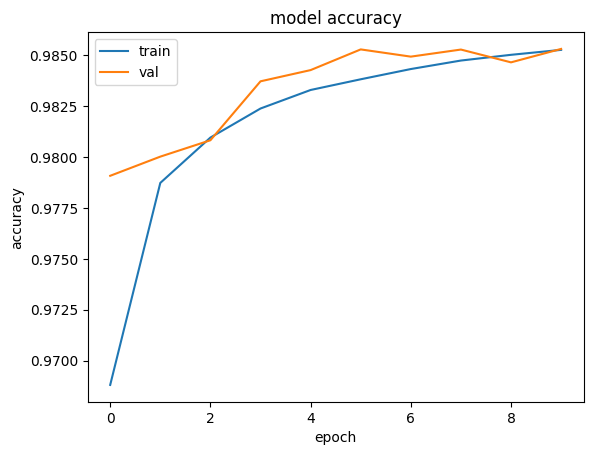

In [7]:
# plot training and validation accuracy over epochs
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [5]:
# print accuracy, precision, recall and f1-score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# print accuracy
print(f"Global Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

# accuracy - one hot encoded
# [1, 0] == BENIGN
# [0, 1] == ATTACK
print(f"Accuracy BENIGN: {accuracy_score(y_test[y_test['BENIGN'] == 1], y_pred[y_test['BENIGN'] == 1]):.2f}")
print(f"Accuracy ATTACK: {accuracy_score(y_test[y_test['BENIGN'] == 0], y_pred[y_test['BENIGN'] == 0]):.2f}")
print(f"Macro AVG Accuracy: {(accuracy_score(y_test[y_test['BENIGN'] == 1], y_pred[y_test['BENIGN'] == 1]) + accuracy_score(y_test[y_test['BENIGN'] == 0], y_pred[y_test['BENIGN'] == 0])) / 2:.2f}")
print(f"Weighted AVG Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# accuracy - normal
# print(f"Accuracy BENIGN: {accuracy_score(y_test[y_test == 0]], y_pred[y_test == 0]):.2f}")
# print(f"Accuracy ATTACK: {accuracy_score(y_test[y_test == 1], y_pred[y_test == 1]):.2f}")
# print(f"Macro AVG Accuracy: {(accuracy_score(y_test[y_test == 0], y_pred[y_test == 0]) + accuracy_score(y_test[y_test == 1], y_pred[y_test == 1])) / 2:.2f}")
# print(f"Weighted AVG Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# precision, recall, f1-score
print(classification_report(y_test, y_pred, target_names=['BENIGN', 'ATTACK']))


22093/22093 ━━━━━━━━━━━━━━━━━━━━ 14s 629us/step
Global Accuracy: 98.55%
Accuracy BENIGN: 0.99
Accuracy ATTACK: 0.97
Macro AVG Accuracy: 0.98
Weighted AVG Accuracy: 0.99
              precision    recall  f1-score   support

      BENIGN       0.99      0.99      0.99    567586
      ATTACK       0.95      0.97      0.96    139383

   micro avg       0.99      0.99      0.99    706969
   macro avg       0.97      0.98      0.98    706969
weighted avg       0.99      0.99      0.99    706969
 samples avg       0.99      0.99      0.99    706969



## Export Model

In [9]:
# export model
model.save('../CICIDS2017/models/ids_dnn.keras')